In [80]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [74]:
from google.colab import files
uploaded = files.upload()

Saving Book1.csv to Book1 (1).csv


In [78]:
path = "global_warming_dataset.csv"
# path ="Book1.csv"
gw_df = pd.read_csv(io.BytesIO(uploaded[path]))
print(gw_df.head())

       Country  Year  Temperature_Anomaly  CO2_Emissions    Population  \
0  Country_103  1913            -1.163537    887606100.4  1.627978e+08   
1  Country_180  1950            -0.432122    449751674.3  4.281359e+08   
2   Country_93  2014             0.444954    457908034.1  4.926732e+08   
3   Country_15  2020            -1.171616    504950343.4  1.252169e+09   
4  Country_107  1964            -0.564038    689889087.8  2.932960e+08   

   Forest_Area           GDP  Renewable_Energy_Usage  Methane_Emissions  \
0    54.872178  6.139890e+12               76.710013        8317625.641   
1    84.051006  2.601450e+12               68.450021        6206539.744   
2    72.295357  5.192680e+12               36.725699        1056885.272   
3    17.259684  8.252130e+12               77.547901        1986812.833   
4    44.438605  8.560750e+12               10.019576        3313252.077   

   Sea_Level_Rise  ...  Waste_Management  Per_Capita_Emissions  \
0        8.111839  ...         82.6914

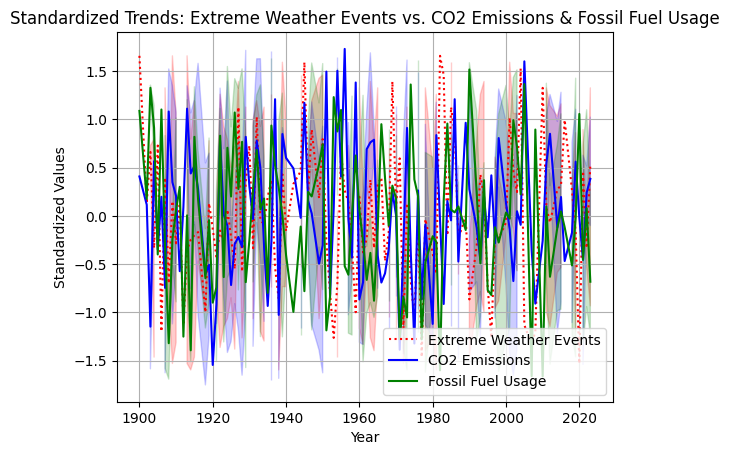


Correlation Matrix:
                         Extreme_Weather_Events  CO2_Emissions  Population  \
Extreme_Weather_Events                1.000000      -0.039323    0.032988   
CO2_Emissions                        -0.039323       1.000000    0.012252   
Population                            0.032988       0.012252    1.000000   
Fossil_Fuel_Usage                     0.010190      -0.137357   -0.045702   

                        Fossil_Fuel_Usage  
Extreme_Weather_Events           0.010190  
CO2_Emissions                   -0.137357  
Population                      -0.045702  
Fossil_Fuel_Usage                1.000000  


In [87]:
# Clean column names
gw_df.columns = gw_df.columns.str.strip()

# Define expected columns and filter dataframe
expected_columns = ["Year", "Extreme_Weather_Events", "CO2_Emissions", "Population", "Fossil_Fuel_Usage"]



# Standardize the data (excluding Year)
scaler = StandardScaler()
gw_df_scaled = pd.DataFrame(scaler.fit_transform(gw_df), columns=gw_df.columns, index=gw_df.index)

# Plot standardized trends
sns.lineplot(data=gw_df_scaled, x=gw_df_scaled.index, y="Extreme_Weather_Events",
             label="Extreme Weather Events", linestyle="dotted", color="red")
sns.lineplot(data=gw_df_scaled, x=gw_df_scaled.index, y="CO2_Emissions",
             label="CO2 Emissions", linestyle="solid", color="blue")
sns.lineplot(data=gw_df_scaled, x=gw_df_scaled.index, y="Fossil_Fuel_Usage",
             label="Fossil Fuel Usage", linestyle="solid", color="green")

# Enhancements
plt.title("Standardized Trends: Extreme Weather Events vs. CO2 Emissions & Fossil Fuel Usage")
plt.xlabel("Year")
plt.ylabel("Standardized Values")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Correlation Analysis
correlation_matrix = gw_df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

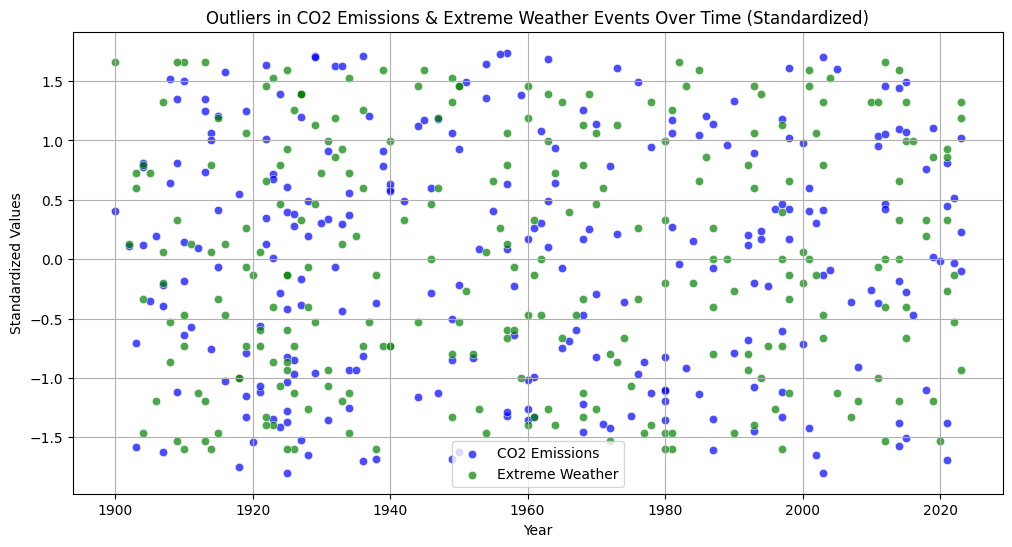

In [88]:
features = ["CO2_Emissions", "Extreme_Weather_Events"]
gw_df = gw_df[features].dropna()

### Standardize Data ###
scaler = StandardScaler()
gw_df_scaled = pd.DataFrame(scaler.fit_transform(gw_df), columns=features, index=gw_df.index)

### Z-SCORE METHOD ###
# Calculate Z-scores
gw_df_scaled["CO2_Zscore"] = np.abs(zscore(gw_df_scaled["CO2_Emissions"]))
gw_df_scaled["Extreme_Weather_Zscore"] = np.abs(zscore(gw_df_scaled["Extreme_Weather_Events"]))

# Identify outliers (Z-score > 3)
gw_df_scaled["CO2_Anomaly"] = gw_df_scaled["CO2_Zscore"] > 3
gw_df_scaled["Extreme_Weather_Anomaly"] = gw_df_scaled["Extreme_Weather_Zscore"] > 3

### ISOLATION FOREST METHOD ###
iso_forest = IsolationForest(contamination=0.05, random_state=42)
gw_df_scaled["Anomaly_Score"] = iso_forest.fit_predict(gw_df_scaled[["CO2_Emissions", "Extreme_Weather_Events"]])

# Convert Isolation Forest output to Boolean (1=Normal, -1=Anomaly)
gw_df_scaled["IF_Anomaly"] = gw_df_scaled["Anomaly_Score"] == -1

### PLOT ANOMALIES ###
plt.figure(figsize=(12, 6))

# Plot normal points
sns.scatterplot(x=gw_df_scaled.index, y=gw_df_scaled["CO2_Emissions"], label="CO2 Emissions", color="blue", alpha=0.7)
sns.scatterplot(x=gw_df_scaled.index, y=gw_df_scaled["Extreme_Weather_Events"], label="Extreme Weather", color="green", alpha=0.7)

# Highlight anomalies
anomalies = gw_df_scaled[(gw_df_scaled["CO2_Anomaly"]) | (gw_df_scaled["Extreme_Weather_Anomaly"])]
sns.scatterplot(x=anomalies.index, y=anomalies["CO2_Emissions"], color="red", label="CO2 Outliers", marker="X", s=100)
sns.scatterplot(x=anomalies.index, y=anomalies["Extreme_Weather_Events"], color="orange", label="Weather Outliers", marker="X", s=100)

# Plot Enhancements
plt.title("Outliers in CO2 Emissions & Extreme Weather Events Over Time (Standardized)")
plt.xlabel("Year")
plt.ylabel("Standardized Values")
plt.legend()
plt.grid(True)
plt.show()

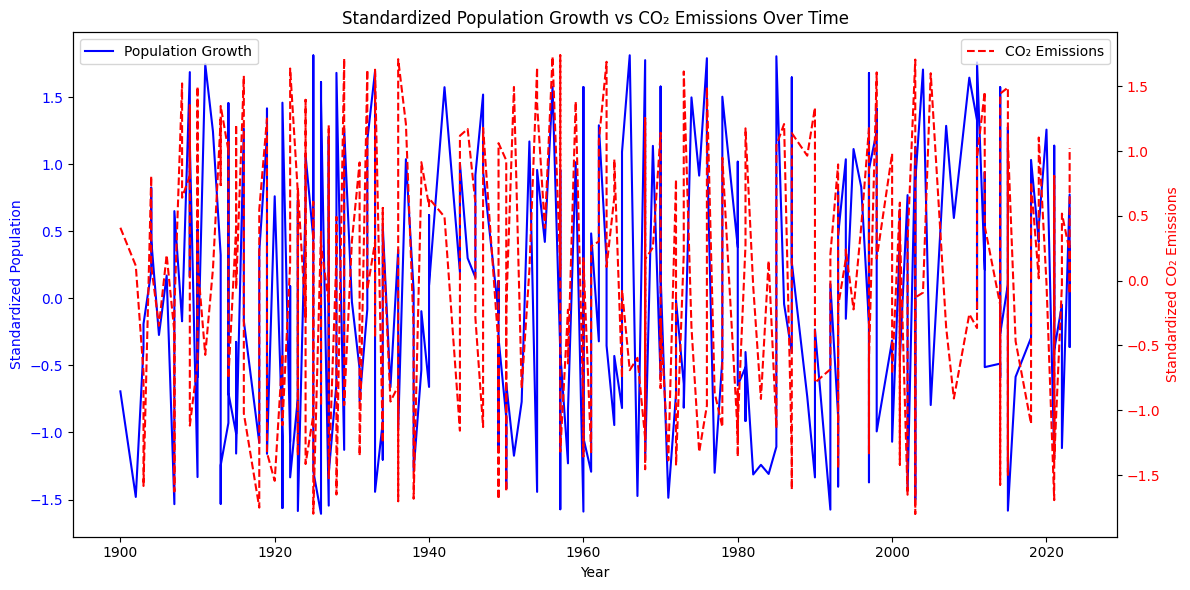

In [90]:
# Reload the dataframe and clean column names
gw_df = pd.read_csv(io.BytesIO(uploaded[path]))
gw_df.columns = gw_df.columns.str.strip()  # Remove leading/trailing spaces

# Define expected columns
expected_columns = ["Year", "Extreme_Weather_Events", "CO2_Emissions", "Population", "Fossil_Fuel_Usage"]
gw_df = gw_df[expected_columns]

# Convert "Year" to datetime and sort
gw_df["Year"] = pd.to_datetime(gw_df["Year"], format="%Y")
gw_df.sort_values("Year", inplace=True)

# Apply StandardScaler to Population and CO₂ Emissions
scaler = StandardScaler()
gw_df_scaled = gw_df.copy()
gw_df_scaled[["Population", "CO2_Emissions"]] = scaler.fit_transform(gw_df[["Population", "CO2_Emissions"]])

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Standardized Population Growth
ax1.set_xlabel("Year")
ax1.set_ylabel("Standardized Population", color="blue")
ax1.plot(gw_df["Year"], gw_df_scaled["Population"], color="blue", label="Population Growth")
ax1.tick_params(axis="y", labelcolor="blue")

# Create secondary y-axis for CO₂ Emissions
ax2 = ax1.twinx()
ax2.set_ylabel("Standardized CO₂ Emissions", color="red")
ax2.plot(gw_df["Year"], gw_df_scaled["CO2_Emissions"], linestyle="dashed", color="red", label="CO₂ Emissions")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("Standardized Population Growth vs CO₂ Emissions Over Time")
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.show()